This notebook is intended to set the intial peak parameters.

## Imports

In [1]:
import pathlib

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum, peak_params_from_dict
import yaml

import analysis_functions as analysis

import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

# Find data files
Rather than type in the full name of each file, it is easier to glob the files and then go through the list.

In [13]:
#data_folder = pathlib.Path("../example_data/caked")
#data_folder = pathlib.Path("../../../SXRD_raw_data/diamond_2017/data_caked/10deg_caked_data_for_SPF/adc_065_TI64_NDload_900C_15mms_ascii/")
data_folder = pathlib.Path("../../../SXRD_analysis/desy_2020/experiment18b-deformation/caking/")
files = sorted(list(data_folder.glob("[!._]*.dat")))

## Initial fit

Specify the name of the file to be analysed and give the angle of the first cake:

In [14]:
file_path = files[0]
print(file_path)
first_cake_angle = 90

../../../SXRD_analysis/desy_2020/experiment18b-deformation/caking/Ti64_Rolled_TD_Compress_910C_1-00s-1_Multi-Hit_Temp_Cycl_4Cs-1_810_Cool_4Cs-1_b_1-00001.dat


Load the data:

/mnt/eps01-rds/Fonseca-Lightform/mbcx9cd4/SXRD_analysis_packages/xrdfit-two-phase-hot-deformation-analysis/venv/lib/python3.7/site-packages/xrdfit/spectrum_fitting.py:299: RuntimeWarning: invalid value encountered in log10
  z_data = np.log10(self.spectral_data[:, 1:])


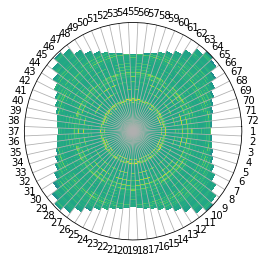

In [5]:
spectral_data = FitSpectrum(file_path, first_cake_angle)
spectral_data.plot_polar()

Choose the cakes to fit:

In [7]:
# cakes_to_fit = [27, 28, 29, 9, 10, 11] # top and bottom slices for 36 cakes
# cakes_to_fit = [18, 19, 20, 54, 55, 56] # top and bottom slices for 72 cakes
cakes_to_fit = [72, 1, 2, 36, 37, 38] # top and bottom slices for 72 cakes
spectral_data.highlight_cakes(cakes_to_fit)

Plot the spectra:

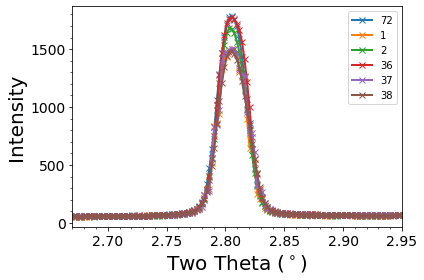

In [7]:
spectral_data.plot(cakes_to_fit, x_range=(2.67, 2.95), show_points=True)

Set the peak parameters:

In [4]:
# DESY 2021

peak_params_data = {'peak1': 
                        {'peak_bounds': '2.67, 2.95', 
                        'maxima_names': '(10-10)'},
#                     'peak2': 
#                         {'peak_bounds': '2.95, 3.3', 
#                         'maxima_names': ['(0002)', '(110)', '(10-11)'],
#                         'maxima_bounds' : ['3.00, 3.05', '3.04, 3.13', '3.15, 3.23']},
#                     'peak3':
#                         {'peak_bounds': '4.03, 4.25', 
#                         'maxima_names': '(10-12)'},
#                     'peak4':
#                         {'peak_bounds': '4.25, 4.55', 
#                         'maxima_names': '(200)'},
#                     'peak5':
#                         {'peak_bounds': '4.78, 4.94', 
#                         'maxima_names': '(11-20)'},
#                     'peak6':
#                         {'peak_bounds': '5.25, 5.5', 
#                         'maxima_names': '(10-13)'},
#                     'peak6': 
#                         {'peak_bounds': '5.25, 5.5', 
#                         'maxima_names': ['(10-13)', '(211)'],
#                         'maxima_bounds' : ['0, 0', '0, 0']},
#                     'peak7': 
#                         {'peak_bounds': '5.51, 5.95', 
#                         'maxima_names': ['(20-20)', '(11-22)', '(20-21)'],
#                         'maxima_bounds' : ['5.58, 5.63', '5.71, 5.75', '5.78, 5.84']},
#                     'peak8': 
#                         {'peak_bounds': '5.96, 6.5', 
#                         'maxima_names': ['(0004)', '(220)', '(20-22)'],
#                         'maxima_bounds' : ['6.04, 6.1', '6.18, 6.25', '6.34, 6.4']},
#                     'peak8':
#                         {'peak_bounds': '5.96, 6.17', 
#                         'maxima_names': '(0004)'},
#                     'peak9': 
#                         {'peak_bounds': '6.15, 6.5', 
#                         'maxima_names': ['(220)', '(20-22)'],
#                         'maxima_bounds' : ['6.18, 6.25', '6.34, 6.4']},                    
                   }

peak_params = peak_params_from_dict(peak_params_data)

print(peak_params)

[<PeakParams((2.67, 2.95), maxima: ['(10-10)'])>, maxima bounds: [(2.67, 2.95)])]


In [58]:
# Diamond 2017

peak_params_data = {'peak1': 
                        {'peak_bounds': '3.02, 3.27', 
                        'maxima_names': '(10-10)'},
                    'peak2': 
                        {'peak_bounds': '3.22, 4.0', 
                        'maxima_names': ['(0002)', '(110)', '(10-11)'],
                        'maxima_bounds' : ['3.4, 3.44', '3.52, 3.55', '3.57, 3.6']},
                    'peak3':
                        {'peak_bounds': '4.54, 4.8', 
                        'maxima_names': '(10-12)'},
                    'peak4':
                        {'peak_bounds': '4.9, 5.1', 
                        'maxima_names': '(200)'},
                    'peak5':
                        {'peak_bounds': '5.35, 5.6', 
                        'maxima_names': '(11-20)'},
                    'peak6':
                        {'peak_bounds': '5.9, 6.25', 
                        'maxima_names': '(10-13)'},
#                     'peak6': 
#                         {'peak_bounds': '5.9, 6.25', 
#                         'maxima_names': ['(10-13)', '(211)'],
#                         'maxima_bounds' : ['6.0, 6.05', '6.11, 6.15']},
                    'peak7': 
                        {'peak_bounds': '6.19, 6.71', 
                        'maxima_names': ['(20-20)', '(11-22)', '(20-21)'],
                        'maxima_bounds' : ['6.3, 6.34', '6.43, 6.47', '6.52, 6.56']},
                    'peak8': 
                        {'peak_bounds': '6.7, 7.35', 
                        'maxima_names': ['(0004)', '(220)', '(20-22)'],
                        'maxima_bounds' : ['6.82, 6.87', '7.05, 7.12', '7.16, 7.20']},
#                     'peak8':
#                         {'peak_bounds': '6.7, 6.95', 
#                         'maxima_names': '(0004)'},
#                     'peak9': 
#                         {'peak_bounds': '6.95, 7.35', 
#                         'maxima_names': ['(220)', '(20-22)'],
#                         'maxima_bounds' : ['7.05, 7.12', '7.16, 7.20']},                    
                   }

peak_params = peak_params_from_dict(peak_params_data)

print(peak_params)

[<PeakParams((3.02, 3.27), maxima: ['(10-10)'])>, maxima bounds: [(3.02, 3.27)]), <PeakParams((3.22, 4.0), maxima: ['(0002)', '(110)', '(10-11)'])>, maxima bounds: [(3.4, 3.44), (3.52, 3.55), (3.57, 3.6)]), <PeakParams((4.54, 4.8), maxima: ['(10-12)'])>, maxima bounds: [(4.54, 4.8)]), <PeakParams((4.9, 5.1), maxima: ['(200)'])>, maxima bounds: [(4.9, 5.1)]), <PeakParams((5.35, 5.6), maxima: ['(11-20)'])>, maxima bounds: [(5.35, 5.6)]), <PeakParams((5.9, 6.25), maxima: ['(10-13)'])>, maxima bounds: [(5.9, 6.25)])]


Check the peak parameters are good

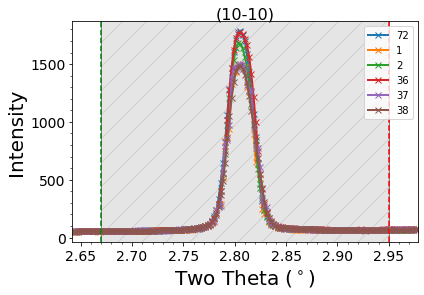

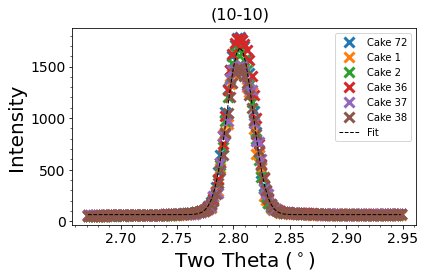

KeyError: "Fit: '(0002) (110) (10-11)' not found"

In [9]:
spectral_data.plot_peak_params(peak_params, cakes_to_fit, show_points=True)
spectral_data.fit_peaks(peak_params, cakes_to_fit, merge_cakes=False)

spectral_data.plot_fit('(10-10)')
spectral_data.plot_fit('(0002) (110) (10-11)')
spectral_data.plot_fit('(10-12)')
spectral_data.plot_fit('(200)')
spectral_data.plot_fit('(11-20)')
# spectral_data.plot_fit('(10-13) (211)')
spectral_data.plot_fit('(10-13)')
spectral_data.plot_fit('(20-20) (11-22) (20-21)')
spectral_data.plot_fit('(0004) (220) (20-22)')
# spectral_data.plot_fit('(0004)')
# spectral_data.plot_fit('(220) (20-22)')

## Check instrument data

The `plot_instrument_data` function in `analysis_functions` can be used to load and plot the instrument data (ETMT analogue output) recorded with each of the diffraction pattern images.

Define a range covering the deformation (in steps of 100 ending with 1) and plot the instrument data:

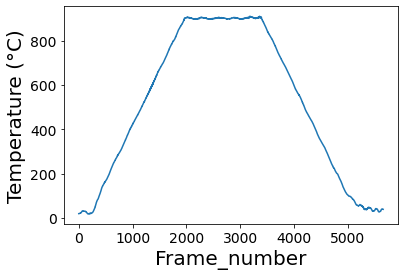

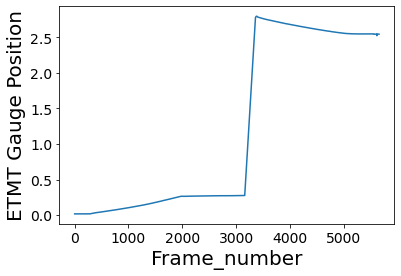

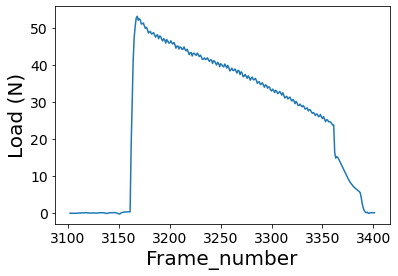

In [37]:
# define the file path to the instrument data 
#file_path_instrument_data = "../example_data/image_load_files_for_DAWN/adc_065_TI64_NDload_900C_15mms.dat"
file_path_instrument_data = "../../../SXRD_raw_data/diamond_2017/data_caked/image_load_files_for_DAWN/adc_065_TI64_NDload_900C_15mms.dat"

# set the range covering deformation
deform_start = 3101
deform_end = 3401

# the calculated max_frame will be used as the last step in a refinement
frame_max = analysis.plot_instrument_data(file_path_instrument_data, deform_start, deform_end)

# Save parameters to be used in the analysis

In [38]:
# set the path to the data file, excluding the image number
data_file = "../../../SXRD_raw_data/diamond_2017/data_caked/10deg_caked_data_for_SPF/adc_065_TI64_NDload_900C_15mms_ascii/adc_065_TI64_NDload_900C_15mms_{:05d}.dat"

# set the acquisition frequency of the frames to set the time
frame_time = 0.1

# set to true if using different frame intervals during heating and cooling stages
frame_interval = True
frame_interval_initial = 50
frame_interval_deform = 1
frame_interval_end = 50

# set merge cakes to false for multiple points
merge_cakes = False

# set reuse fits to true for passing on peak parameters from each fit
reuse_fits = True

In [23]:
# set the YAML file name
params_file_name = "desy_2020_experiment18b_stage_5"

# set the path to the data file, excluding the image number
data_file = "../../../SXRD_analysis/desy_2020/experiment18b-deformation/caking/Ti64_Rolled_TD_Compress_910C_1-00s-1_Multi-Hit_Temp_Cycl_4Cs-1_810_Cool_4Cs-1_b_5-{:05d}.dat"

# set the acquisition frequency of the frames to set the time
frame_time = 0.1

# set deform start and end manually
deform_start = 0
deform_end = 0

# set max frame manually

# DESY 2021 experiment 03
# frame_max = 2034
# frame_max = 513
# frame_max = 514
# frame_max = 513
# frame_max = 2067

# DESY 2021 experiment 04
# frame_max = 2028
# frame_max = 516
# frame_max = 516
# frame_max = 514
# frame_max = 2229

# DESY 2020 experiment 18b  
# frame_max = 2007
# frame_max = 515
# frame_max = 514
# frame_max = 514
frame_max = 2275

# set to true if using different frame intervals during heating and cooling stages
frame_interval = False
frame_interval_initial = 1
frame_interval_deform = 1
frame_interval_end = 1

# set merge cakes to false for multiple points
merge_cakes = False

# set reuse fits to true for passing on peak parameters from each fit
reuse_fits = True

In [11]:
# set the YAML file name
params_file_name = "desy_2020_experiment16"

# set the path to the data file, excluding the image number
data_file = "../../../SXRD_analysis/desy_2020/experiment16-deformation/caking/Ti6246_Forged_DD_Compress_880C_1-00s-1_Single-Hit_Cool_60Cs-1_1-{:05d}.dat"

# set the acquisition frequency of the frames to set the time
frame_time = 0.1

# set deform start and end manually
deform_start = 0
deform_end = 0

# set max frame manually
frame_max = 3982

# set to true if using different frame intervals during heating and cooling stages
frame_interval = False
frame_interval_initial = 1
frame_interval_deform = 1
frame_interval_end = 1

# set merge cakes to false for multiple points
merge_cakes = False

# set reuse fits to true for passing on peak parameters from each fit
reuse_fits = True

In [24]:
params = {"data_file": data_file,
          "first_cake_angle": first_cake_angle,
          "cakes_to_fit": cakes_to_fit,
          "frame_time": frame_time,
          "merge_cakes": merge_cakes,
          "reuse_fits": reuse_fits,
          "deform_start": deform_start,
          "deform_end": deform_end,
          "frame_max": frame_max,
          "frame_interval": frame_interval,
          "frame_interval_initial": frame_interval_initial,
          "frame_interval_deform": frame_interval_deform,
          "frame_interval_end": frame_interval_end,
          "peak_params": peak_params_data
         }

data_folder = f"../yaml/{params_file_name}.yaml"
with open(data_folder, "w") as output_file:
    yaml.dump(params, output_file)